# NBA Salary Analysis 2019-2020 Regular Season
<br>
Created by:
<br>
John Gomes
<br>
Rayaan Meeran

## Importing and reading csv files
Reading csv files for the NBA player **salaries** and **statistics**

##### Training
- 2016 - 2017 Regular Season
- 2017 - 2018 Regular Season
- 2018 - 2019 Regular Season

##### Testing
- 2019 - 2020 Regular Season

In [1]:
import pandas as pd 
import numpy as np
import chardet

with open('NBA_2018-19_Player_Salaries.csv', 'rb') as f:
    result = chardet.detect(f.read())
player_salaries_18_19 = pd.read_csv('NBA_2018-19_Player_Salaries.csv', encoding=result['encoding'])

with open('NBA_2018-19_Player_Stats.csv', 'rb') as f:
    result = chardet.detect(f.read())
player_stats_18_19 = pd.read_csv('NBA_2018-19_Player_Stats.csv', encoding=result['encoding'])

with open('NBA_2017-18_Player_Salaries.csv', 'rb') as f:
    result = chardet.detect(f.read())
player_salaries_17_18 = pd.read_csv('NBA_2017-18_Player_Salaries.csv', encoding=result['encoding'])

with open('NBA_2017-18_Player_Stats.csv', 'rb') as f:
    result = chardet.detect(f.read())
player_stats_17_18 = pd.read_csv('NBA_2017-18_Player_Stats.csv', encoding=result['encoding'])

with open('NBA_2016-17_Player_Salaries.csv', 'rb') as f:
    result = chardet.detect(f.read())
player_salaries_16_17 = pd.read_csv('NBA_2016-17_Player_Salaries.csv', encoding=result['encoding'])

with open('NBA_2016-17_Player_Stats.csv', 'rb') as f:
    result = chardet.detect(f.read())
player_stats_16_17 = pd.read_csv('NBA_2016-17_Player_Stats.csv', encoding=result['encoding'])

## Cleaning up the data
- Convert player positions in statistics from **letters** to **numbers**:
	- PG = 1
    - G = 1
	- SG = 2
	- SF = 3
    - F = 3
	- PF = 4
	- C = 5

- Remove repeating players in statistics who have played on multiple teams. In this case, take the row with the **total (TOT)** stats for that player.

In [2]:
import unicodedata
def strip_accents(s):
   return ''.join(c for c in unicodedata.normalize('NFD', s)
                  if unicodedata.category(c) != 'Mn')

# 2018 - 2019
name_array = []
rank = 0
for index, row in player_stats_18_19.iterrows():
    if row['Pos'] == 'G':
        player_stats_18_19.iloc[index, player_stats_18_19.columns.get_loc('Pos')] = 1
    elif row['Pos'] == 'F':
        player_stats_18_19.iloc[index, player_stats_18_19.columns.get_loc('Pos')] = 3
    elif row['Pos'] == 'PG':
        player_stats_18_19.iloc[index, player_stats_18_19.columns.get_loc('Pos')] = 1
    elif row['Pos'] == 'SG':
        player_stats_18_19.iloc[index, player_stats_18_19.columns.get_loc('Pos')] = 2
    elif row['Pos'] == 'SF':
        player_stats_18_19.iloc[index, player_stats_18_19.columns.get_loc('Pos')] = 3
    elif row['Pos'] == 'PF':
        player_stats_18_19.iloc[index, player_stats_18_19.columns.get_loc('Pos')] = 4
    elif row['Pos'] == 'C':
        player_stats_18_19.iloc[index, player_stats_18_19.columns.get_loc('Pos')] = 5
            
    unaccented = strip_accents(row['Player'])
    unaccented = unaccented.replace('.','')
    player_stats_18_19.iloc[index, player_stats_18_19.columns.get_loc('Player')] = unaccented
    
    if row['Tm'] == 'TOT':
        rank = row['Rk']
    elif rank == row['Rk']:
        name_array.append(index)
    else:
        rank = 0
        
name_array = np.array(name_array)

for i in name_array:
    player_stats_18_19.drop(i, inplace=True)
    
player_stats_18_19.reset_index(drop=True, inplace=True)
player_stats_18_19.fillna(0, inplace=True)


# 2017 - 2018
name_array = []
rank = 0
for index, row in player_stats_17_18.iterrows():
    if row['Pos'] == 'G':
        player_stats_17_18.iloc[index, player_stats_17_18.columns.get_loc('Pos')] = 1
    elif row['Pos'] == 'F':
        player_stats_17_18.iloc[index, player_stats_17_18.columns.get_loc('Pos')] = 3
    elif row['Pos'] == 'PG':
        player_stats_17_18.iloc[index, player_stats_17_18.columns.get_loc('Pos')] = 1
    elif row['Pos'] == 'SG':
        player_stats_17_18.iloc[index, player_stats_17_18.columns.get_loc('Pos')] = 2
    elif row['Pos'] == 'SF':
        player_stats_17_18.iloc[index, player_stats_17_18.columns.get_loc('Pos')] = 3
    elif row['Pos'] == 'PF':
        player_stats_17_18.iloc[index, player_stats_17_18.columns.get_loc('Pos')] = 4
    elif row['Pos'] == 'C':
        player_stats_17_18.iloc[index, player_stats_17_18.columns.get_loc('Pos')] = 5
            
    unaccented = strip_accents(row['Player'])
    unaccented = unaccented.replace('.','')
    player_stats_17_18.iloc[index, player_stats_17_18.columns.get_loc('Player')] = unaccented
    
    if row['Tm'] == 'TOT':
        rank = row['Rk']
    elif rank == row['Rk']:
        name_array.append(index)
    else:
        rank = 0
        
name_array = np.array(name_array)

for i in name_array:
    player_stats_17_18.drop(i, inplace=True)
    
player_stats_17_18.reset_index(drop=True, inplace=True)
player_stats_17_18.fillna(0, inplace=True)


# 2016 - 2017
name_array = []
rank = 0
for index, row in player_stats_16_17.iterrows():
    if row['Pos'] == 'G':
        player_stats_16_17.iloc[index, player_stats_16_17.columns.get_loc('Pos')] = 1
    elif row['Pos'] == 'F':
        player_stats_16_17.iloc[index, player_stats_16_17.columns.get_loc('Pos')] = 3
    elif row['Pos'] == 'PG':
        player_stats_16_17.iloc[index, player_stats_16_17.columns.get_loc('Pos')] = 1
    elif row['Pos'] == 'SG':
        player_stats_16_17.iloc[index, player_stats_16_17.columns.get_loc('Pos')] = 2
    elif row['Pos'] == 'SF':
        player_stats_16_17.iloc[index, player_stats_16_17.columns.get_loc('Pos')] = 3
    elif row['Pos'] == 'PF':
        player_stats_16_17.iloc[index, player_stats_16_17.columns.get_loc('Pos')] = 4
    elif row['Pos'] == 'C':
        player_stats_16_17.iloc[index, player_stats_16_17.columns.get_loc('Pos')] = 5
            
    unaccented = strip_accents(row['Player'])
    unaccented = unaccented.replace('.','')
    player_stats_16_17.iloc[index, player_stats_16_17.columns.get_loc('Player')] = unaccented
    
    if row['Tm'] == 'TOT':
        rank = row['Rk']
    elif rank == row['Rk']:
        name_array.append(index)
    else:
        rank = 0
        
name_array = np.array(name_array)

for i in name_array:
    player_stats_16_17.drop(i, inplace=True)
    
player_stats_16_17.reset_index(drop=True, inplace=True)
player_stats_16_17.fillna(0, inplace=True)

player_stats_16_17

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,1,Alex Abrines,2,23,OKC,68,6,15.5,2.0,5.0,...,8.3,15.9,1.2,0.9,2.1,0.096,-0.3,-2.2,-2.5,-0.1
1,2,Quincy Acy,4,26,TOT,38,1,14.7,1.8,4.5,...,9.7,16.8,0.5,0.5,0.9,0.082,-1.8,-1.2,-3.0,-0.1
2,3,Steven Adams,5,23,OKC,80,80,29.9,4.7,8.2,...,16.0,16.2,3.3,3.1,6.5,0.130,-0.7,1.2,0.6,1.5
3,4,Arron Afflalo,2,31,SAC,61,45,25.9,3.0,6.9,...,8.4,14.4,1.2,0.2,1.4,0.043,-1.4,-2.1,-3.5,-0.6
4,5,Alexis Ajinca,5,28,NOP,39,15,15.0,2.3,4.6,...,13.7,17.2,0.0,0.9,1.0,0.080,-5.1,1.0,-4.1,-0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,482,Cody Zeller,5,24,CHO,62,58,27.8,4.1,7.1,...,10.9,15.5,3.4,2.2,5.6,0.157,-0.2,2.3,2.1,1.8
482,483,Tyler Zeller,5,27,BOS,51,5,10.3,1.5,3.1,...,10.2,16.5,0.5,0.6,1.0,0.094,-3.3,0.8,-2.5,-0.1
483,484,Stephen Zimmerman,5,20,ORL,19,0,5.7,0.5,1.6,...,8.3,14.8,-0.1,0.1,0.0,-0.005,-7.8,0.4,-7.3,-0.1
484,485,Paul Zipser,3,22,CHI,44,18,19.2,2.0,5.0,...,14.4,14.4,-0.3,0.8,0.5,0.030,-3.6,-0.1,-3.7,-0.4


# Match player salaries to player stats
Add player salaries to dataframes

In [3]:
# 2018 - 2019
player_stats_18_19["Salary"] = np.nan
salary_array = []

for index, row in player_stats_18_19.iterrows():
    player = row['Player']
    player_row = player_salaries_18_19.loc[player_salaries_18_19['Player'] == player]
    isempty = player_row.empty 
    if isempty:
        salary_array.append(index)
        salary = 0
    else:
        salary = player_row.iloc[0][2]
        salary = salary.replace('$','')
        salary = salary.replace(',','')
    player_stats_18_19.iloc[index, player_stats_18_19.columns.get_loc('Salary')] = salary

for i in salary_array:
    player_stats_18_19.drop(i, inplace=True)
player_stats_18_19.reset_index(drop=True, inplace=True)


# 2017 - 2018
player_stats_17_18["Salary"] = np.nan
salary_array = []

for index, row in player_stats_17_18.iterrows():
    player = row['Player']
    player_row = player_salaries_17_18.loc[player_salaries_17_18['Player'] == player]
    isempty = player_row.empty 
    if isempty:
        salary_array.append(index)
        salary = 0
    else:
        salary = player_row.iloc[0][2]
        salary = salary.replace('$','')
        salary = salary.replace(',','')
    player_stats_17_18.iloc[index, player_stats_17_18.columns.get_loc('Salary')] = salary

for i in salary_array:
    player_stats_17_18.drop(i, inplace=True)
player_stats_17_18.reset_index(drop=True, inplace=True)


# 2016 - 2017
player_stats_16_17["Salary"] = np.nan
salary_array = []

for index, row in player_stats_16_17.iterrows():
    player = row['Player']
    player_row = player_salaries_16_17.loc[player_salaries_16_17['Player'] == player]
    isempty = player_row.empty 
    if isempty:
        salary_array.append(index)
        salary = 0
    else:
        salary = player_row.iloc[0][2]
        salary = salary.replace('$','')
        salary = salary.replace(',','')
    player_stats_16_17.iloc[index, player_stats_16_17.columns.get_loc('Salary')] = salary

for i in salary_array:
    player_stats_16_17.drop(i, inplace=True)
player_stats_16_17.reset_index(drop=True, inplace=True)


player_stats_16_17

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Salary
0,1,Alex Abrines,2,23,OKC,68,6,15.5,2.0,5.0,...,15.9,1.2,0.9,2.1,0.096,-0.3,-2.2,-2.5,-0.1,5994764
1,2,Quincy Acy,4,26,TOT,38,1,14.7,1.8,4.5,...,16.8,0.5,0.5,0.9,0.082,-1.8,-1.2,-3.0,-0.1,2965505
2,3,Steven Adams,5,23,OKC,80,80,29.9,4.7,8.2,...,16.2,3.3,3.1,6.5,0.130,-0.7,1.2,0.6,1.5,3140517
3,4,Arron Afflalo,2,31,SAC,61,45,25.9,3.0,6.9,...,14.4,1.2,0.2,1.4,0.043,-1.4,-2.1,-3.5,-0.6,12500000
4,5,Alexis Ajinca,5,28,NOP,39,15,15.0,2.3,4.6,...,17.2,0.0,0.9,1.0,0.080,-5.1,1.0,-4.1,-0.3,4863206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460,482,Cody Zeller,5,24,CHO,62,58,27.8,4.1,7.1,...,15.5,3.4,2.2,5.6,0.157,-0.2,2.3,2.1,1.8,5318313
461,483,Tyler Zeller,5,27,BOS,51,5,10.3,1.5,3.1,...,16.5,0.5,0.6,1.0,0.094,-3.3,0.8,-2.5,-0.1,8000000
462,484,Stephen Zimmerman,5,20,ORL,19,0,5.7,0.5,1.6,...,14.8,-0.1,0.1,0.0,-0.005,-7.8,0.4,-7.3,-0.1,950000
463,485,Paul Zipser,3,22,CHI,44,18,19.2,2.0,5.0,...,14.4,-0.3,0.8,0.5,0.030,-3.6,-0.1,-3.7,-0.4,750000


# Combine dataframes for training
Combining player statistics dataframes into one for training

In [4]:
dataframes = [player_stats_18_19, player_stats_17_18, player_stats_16_17]
player_stats_training = pd.concat(dataframes)
player_stats_training.reset_index(drop=True, inplace=True)

player_stats_training

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Salary
0,1,Alex Abrines,2,25,OKC,31,2,19.0,1.8,5.1,...,12.2,0.1,0.6,0.6,0.053,-2.4,-0.9,-3.4,-0.2,3667645
1,2,Quincy Acy,4,28,PHO,10,0,12.3,0.4,1.8,...,9.2,-0.1,0.0,-0.1,-0.022,-5.7,-0.3,-5.9,-0.1,213948
2,3,Jaylen Adams,1,22,ATL,34,1,12.6,1.1,3.2,...,13.5,-0.1,0.2,0.1,0.011,-3.1,-1.3,-4.4,-0.3,236854
3,4,Steven Adams,5,25,OKC,80,80,33.4,6.0,10.1,...,16.4,5.1,4.0,9.1,0.163,0.6,2.1,2.7,3.2,24157304
4,5,Bam Adebayo,5,21,MIA,82,28,23.3,3.4,5.9,...,15.8,3.4,3.4,6.8,0.171,-0.6,3.6,3.0,2.4,2955840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1488,482,Cody Zeller,5,24,CHO,62,58,27.8,4.1,7.1,...,15.5,3.4,2.2,5.6,0.157,-0.2,2.3,2.1,1.8,5318313
1489,483,Tyler Zeller,5,27,BOS,51,5,10.3,1.5,3.1,...,16.5,0.5,0.6,1.0,0.094,-3.3,0.8,-2.5,-0.1,8000000
1490,484,Stephen Zimmerman,5,20,ORL,19,0,5.7,0.5,1.6,...,14.8,-0.1,0.1,0.0,-0.005,-7.8,0.4,-7.3,-0.1,950000
1491,485,Paul Zipser,3,22,CHI,44,18,19.2,2.0,5.0,...,14.4,-0.3,0.8,0.5,0.030,-3.6,-0.1,-3.7,-0.4,750000


# Testing data

In [5]:
with open('NBA_2019-20_Player_Salaries.csv', 'rb') as f:
    result = chardet.detect(f.read())
player_salaries_19_20 = pd.read_csv('NBA_2019-20_Player_Salaries.csv', encoding=result['encoding'])

with open('NBA_2019-20_Player_Stats.csv', 'rb') as f:
    result = chardet.detect(f.read())
player_stats_19_20 = pd.read_csv('NBA_2019-20_Player_Stats.csv', encoding=result['encoding'])

# 2019 - 2020
name_array = []
rank = 0
for index, row in player_stats_19_20.iterrows():
    if row['Pos'] == 'G':
        player_stats_19_20.iloc[index, player_stats_19_20.columns.get_loc('Pos')] = 1
    elif row['Pos'] == 'F':
        player_stats_19_20.iloc[index, player_stats_19_20.columns.get_loc('Pos')] = 3
    elif row['Pos'] == 'PG':
        player_stats_19_20.iloc[index, player_stats_19_20.columns.get_loc('Pos')] = 1
    elif row['Pos'] == 'SG':
        player_stats_19_20.iloc[index, player_stats_19_20.columns.get_loc('Pos')] = 2
    elif row['Pos'] == 'SF':
        player_stats_19_20.iloc[index, player_stats_19_20.columns.get_loc('Pos')] = 3
    elif row['Pos'] == 'PF':
        player_stats_19_20.iloc[index, player_stats_19_20.columns.get_loc('Pos')] = 4
    elif row['Pos'] == 'C':
        player_stats_19_20.iloc[index, player_stats_19_20.columns.get_loc('Pos')] = 5
            
    unaccented = strip_accents(row['Player'])
    unaccented = unaccented.replace('.','')
    player_stats_19_20.iloc[index, player_stats_19_20.columns.get_loc('Player')] = unaccented
    
    if row['Tm'] == 'TOT':
        rank = row['Rk']
    elif rank == row['Rk']:
        name_array.append(index)
    else:
        rank = 0
        
name_array = np.array(name_array)

for i in name_array:
    player_stats_19_20.drop(i, inplace=True)
    
player_stats_19_20.reset_index(drop=True, inplace=True)
player_stats_19_20.fillna(0, inplace=True)


# 2019 - 2020
player_stats_19_20["Salary"] = np.nan
salary_array = []

for index, row in player_stats_19_20.iterrows():
    player = row['Player']
    player_row = player_salaries_19_20.loc[player_salaries_19_20['Player'] == player]
    isempty = player_row.empty 
    if isempty:
        salary_array.append(index)
        salary = 0
    else:
        salary = player_row.iloc[0][2]
        salary = salary.replace('$','')
        salary = salary.replace(',','')
    player_stats_19_20.iloc[index, player_stats_19_20.columns.get_loc('Salary')] = salary

for i in salary_array:
    player_stats_19_20.drop(i, inplace=True)
player_stats_19_20.reset_index(drop=True, inplace=True)

player_stats_19_20

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Salary
0,1,Steven Adams,5,26,OKC,63,63,26.7,4.5,7.6,...,17.3,3.8,2.7,6.5,0.185,1.9,1.1,2.9,2.1,25842697
1,2,Bam Adebayo,4,22,MIA,72,72,33.6,6.1,11.0,...,21.2,4.6,3.9,8.5,0.168,1.4,2.0,3.4,3.3,3454080
2,3,LaMarcus Aldridge,5,34,SAS,53,53,33.1,7.4,15.0,...,23.4,3.0,1.4,4.5,0.122,1.8,-0.5,1.4,1.5,26000000
3,5,Nickeil Alexander-Walker,2,21,NOP,47,1,12.6,2.1,5.7,...,23.3,-0.7,0.4,-0.2,-0.020,-3.2,-1.4,-4.6,-0.4,2964840
4,6,Grayson Allen,2,24,MEM,38,0,18.9,3.1,6.6,...,17.6,0.8,0.4,1.2,0.082,-0.1,-1.2,-1.3,0.1,2429400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,524,Thaddeus Young,4,31,CHI,64,16,24.9,4.2,9.4,...,19.7,-0.2,2.1,1.9,0.058,-1.4,0.2,-1.2,0.3,12900000
472,525,Trae Young,1,21,ATL,60,60,35.3,9.1,20.8,...,34.9,5.3,0.6,5.9,0.133,6.2,-2.3,3.9,3.1,6273000
473,526,Cody Zeller,5,27,CHO,58,39,23.1,4.3,8.3,...,20.8,2.3,1.3,3.6,0.129,0.2,-0.8,-0.6,0.5,14471910
474,528,Ante Zizic,5,23,CLE,22,0,10.0,1.9,3.3,...,17.5,0.3,0.2,0.5,0.106,-1.7,-1.5,-3.2,-0.1,2281800


# Creating training and testing data

In [6]:
train_X = player_stats_training[['MP', 'PTS', 'FG', 'FGA', '3P', '3PA', 'FT', 'FTA', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PER', 'TS%', 'USG%', 'BPM', 'VORP']]
train_y = player_stats_training['Salary']

test_X = player_stats_19_20[['MP', 'PTS', 'FG', 'FGA', '3P', '3PA', 'FT', 'FTA', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PER', 'TS%', 'USG%', 'BPM', 'VORP']]
test_y = player_stats_19_20['Salary']

# Linear Regression

In [7]:
from sklearn import linear_model

linear_reg = linear_model.LinearRegression()
linear_reg.fit(train_X, train_y)
linear_reg_pred = linear_reg.predict(test_X)

player_stats_19_20["LinReg"] = np.nan

for index, row in player_stats_19_20.iterrows():
    prednum = str(int(float(linear_reg_pred[index])))
    player_stats_19_20.iloc[index, player_stats_19_20.columns.get_loc('LinReg')] = prednum

sal_diff = []
for index, row in player_stats_19_20.iterrows():
    diff = int(row['LinReg']) - int(row['Salary'])
    sal_diff.append([diff, index])
sal_diff.sort()

player_stats_19_20

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Salary,LinReg
0,1,Steven Adams,5,26,OKC,63,63,26.7,4.5,7.6,...,3.8,2.7,6.5,0.185,1.9,1.1,2.9,2.1,25842697,12674606
1,2,Bam Adebayo,4,22,MIA,72,72,33.6,6.1,11.0,...,4.6,3.9,8.5,0.168,1.4,2.0,3.4,3.3,3454080,17629210
2,3,LaMarcus Aldridge,5,34,SAS,53,53,33.1,7.4,15.0,...,3.0,1.4,4.5,0.122,1.8,-0.5,1.4,1.5,26000000,14136832
3,5,Nickeil Alexander-Walker,2,21,NOP,47,1,12.6,2.1,5.7,...,-0.7,0.4,-0.2,-0.020,-3.2,-1.4,-4.6,-0.4,2964840,3054399
4,6,Grayson Allen,2,24,MEM,38,0,18.9,3.1,6.6,...,0.8,0.4,1.2,0.082,-0.1,-1.2,-1.3,0.1,2429400,5498812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,524,Thaddeus Young,4,31,CHI,64,16,24.9,4.2,9.4,...,-0.2,2.1,1.9,0.058,-1.4,0.2,-1.2,0.3,12900000,6896945
472,525,Trae Young,1,21,ATL,60,60,35.3,9.1,20.8,...,5.3,0.6,5.9,0.133,6.2,-2.3,3.9,3.1,6273000,23768897
473,526,Cody Zeller,5,27,CHO,58,39,23.1,4.3,8.3,...,2.3,1.3,3.6,0.129,0.2,-0.8,-0.6,0.5,14471910,8333979
474,528,Ante Zizic,5,23,CLE,22,0,10.0,1.9,3.3,...,0.3,0.2,0.5,0.106,-1.7,-1.5,-3.2,-0.1,2281800,2469890


# SVM

In [8]:
from sklearn import svm

svm = svm.SVC(kernel = 'poly', max_iter=1000, gamma='auto')
svm.fit(train_X, train_y)
svm_pred = svm.predict(test_X)

player_stats_19_20["SVM"] = np.nan

for index, row in player_stats_19_20.iterrows():
    prednum = str(int(float(svm_pred[index])))
    player_stats_19_20.iloc[index, player_stats_19_20.columns.get_loc('SVM')] = prednum

sal_diff = []
for index, row in player_stats_19_20.iterrows():
    diff = int(row['SVM']) - int(row['Salary'])
    sal_diff.append([diff, index])
sal_diff.sort()

player_stats_19_20

C:\Users\johng\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Salary,LinReg,SVM
0,1,Steven Adams,5,26,OKC,63,63,26.7,4.5,7.6,...,2.7,6.5,0.185,1.9,1.1,2.9,2.1,25842697,12674606,4696874
1,2,Bam Adebayo,4,22,MIA,72,72,33.6,6.1,11.0,...,3.9,8.5,0.168,1.4,2.0,3.4,3.3,3454080,17629210,6434520
2,3,LaMarcus Aldridge,5,34,SAS,53,53,33.1,7.4,15.0,...,1.4,4.5,0.122,1.8,-0.5,1.4,1.5,26000000,14136832,20575005
3,5,Nickeil Alexander-Walker,2,21,NOP,47,1,12.6,2.1,5.7,...,0.4,-0.2,-0.020,-3.2,-1.4,-4.6,-0.4,2964840,3054399,1914480
4,6,Grayson Allen,2,24,MEM,38,0,18.9,3.1,6.6,...,0.4,1.2,0.082,-0.1,-1.2,-1.3,0.1,2429400,5498812,2795000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,524,Thaddeus Young,4,31,CHI,64,16,24.9,4.2,9.4,...,2.1,1.9,0.058,-1.4,0.2,-1.2,0.3,12900000,6896945,2526840
472,525,Trae Young,1,21,ATL,60,60,35.3,9.1,20.8,...,0.6,5.9,0.133,6.2,-2.3,3.9,3.1,6273000,23768897,6587131
473,526,Cody Zeller,5,27,CHO,58,39,23.1,4.3,8.3,...,1.3,3.6,0.129,0.2,-0.8,-0.6,0.5,14471910,8333979,2550000
474,528,Ante Zizic,5,23,CLE,22,0,10.0,1.9,3.3,...,0.2,0.5,0.106,-1.7,-1.5,-3.2,-0.1,2281800,2469890,950000


# Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver='saga', max_iter=50)
log_reg.fit(train_X, train_y)
log_reg_pred = log_reg.predict(test_X)

player_stats_19_20["LogReg"] = np.nan

for index, row in player_stats_19_20.iterrows():
    prednum = str(int(float(log_reg_pred[index])))
    player_stats_19_20.iloc[index, player_stats_19_20.columns.get_loc('LogReg')] = prednum

sal_diff = []
for index, row in player_stats_19_20.iterrows():
    diff = int(row['LogReg']) - int(row['Salary'])
    sal_diff.append([diff, index])
sal_diff.sort()

player_stats_19_20

C:\Users\johng\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\johng\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,WS,WS/48,OBPM,DBPM,BPM,VORP,Salary,LinReg,SVM,LogReg
0,1,Steven Adams,5,26,OKC,63,63,26.7,4.5,7.6,...,6.5,0.185,1.9,1.1,2.9,2.1,25842697,12674606,4696874,1471382
1,2,Bam Adebayo,4,22,MIA,72,72,33.6,6.1,11.0,...,8.5,0.168,1.4,2.0,3.4,3.3,3454080,17629210,6434520,23775506
2,3,LaMarcus Aldridge,5,34,SAS,53,53,33.1,7.4,15.0,...,4.5,0.122,1.8,-0.5,1.4,1.5,26000000,14136832,20575005,22116750
3,5,Nickeil Alexander-Walker,2,21,NOP,47,1,12.6,2.1,5.7,...,-0.2,-0.020,-3.2,-1.4,-4.6,-0.4,2964840,3054399,1914480,77250
4,6,Grayson Allen,2,24,MEM,38,0,18.9,3.1,6.6,...,1.2,0.082,-0.1,-1.2,-1.3,0.1,2429400,5498812,2795000,77250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,524,Thaddeus Young,4,31,CHI,64,16,24.9,4.2,9.4,...,1.9,0.058,-1.4,0.2,-1.2,0.3,12900000,6896945,2526840,1312611
472,525,Trae Young,1,21,ATL,60,60,35.3,9.1,20.8,...,5.9,0.133,6.2,-2.3,3.9,3.1,6273000,23768897,6587131,12000000
473,526,Cody Zeller,5,27,CHO,58,39,23.1,4.3,8.3,...,3.6,0.129,0.2,-0.8,-0.6,0.5,14471910,8333979,2550000,77250
474,528,Ante Zizic,5,23,CLE,22,0,10.0,1.9,3.3,...,0.5,0.106,-1.7,-1.5,-3.2,-0.1,2281800,2469890,950000,77250


# Naive Bayes

In [10]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(train_X, train_y)
nb_pred = nb.predict(test_X)

player_stats_19_20["Bayes"] = np.nan

for index, row in player_stats_19_20.iterrows():
    prednum = str(int(float(nb_pred[index])))
    player_stats_19_20.iloc[index, player_stats_19_20.columns.get_loc('Bayes')] = prednum

sal_diff = []
for index, row in player_stats_19_20.iterrows():
    diff = int(row['Bayes']) - int(row['Salary'])
    sal_diff.append([diff, index])
sal_diff.sort()

player_stats_19_20

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,WS/48,OBPM,DBPM,BPM,VORP,Salary,LinReg,SVM,LogReg,Bayes
0,1,Steven Adams,5,26,OKC,63,63,26.7,4.5,7.6,...,0.185,1.9,1.1,2.9,2.1,25842697,12674606,4696874,1471382,22642350
1,2,Bam Adebayo,4,22,MIA,72,72,33.6,6.1,11.0,...,0.168,1.4,2.0,3.4,3.3,3454080,17629210,6434520,23775506,21165675
2,3,LaMarcus Aldridge,5,34,SAS,53,53,33.1,7.4,15.0,...,0.122,1.8,-0.5,1.4,1.5,26000000,14136832,20575005,22116750,23775506
3,5,Nickeil Alexander-Walker,2,21,NOP,47,1,12.6,2.1,5.7,...,-0.020,-3.2,-1.4,-4.6,-0.4,2964840,3054399,1914480,77250,1312611
4,6,Grayson Allen,2,24,MEM,38,0,18.9,3.1,6.6,...,0.082,-0.1,-1.2,-1.3,0.1,2429400,5498812,2795000,77250,2500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,524,Thaddeus Young,4,31,CHI,64,16,24.9,4.2,9.4,...,0.058,-1.4,0.2,-1.2,0.3,12900000,6896945,2526840,1312611,8000000
472,525,Trae Young,1,21,ATL,60,60,35.3,9.1,20.8,...,0.133,6.2,-2.3,3.9,3.1,6273000,23768897,6587131,12000000,26540100
473,526,Cody Zeller,5,27,CHO,58,39,23.1,4.3,8.3,...,0.129,0.2,-0.8,-0.6,0.5,14471910,8333979,2550000,77250,13000000
474,528,Ante Zizic,5,23,CLE,22,0,10.0,1.9,3.3,...,0.106,-1.7,-1.5,-3.2,-0.1,2281800,2469890,950000,77250,950000


# Decision Tree

In [11]:
from sklearn import tree

dt = tree.DecisionTreeRegressor()
dt.fit(train_X, train_y)
dt_pred = dt.predict(test_X)

player_stats_19_20["DecTree"] = np.nan

for index, row in player_stats_19_20.iterrows():
    prednum = str(int(float(dt_pred[index])))
    player_stats_19_20.iloc[index, player_stats_19_20.columns.get_loc('DecTree')] = prednum

sal_diff = []
for index, row in player_stats_19_20.iterrows():
    diff = int(row['DecTree']) - int(row['Salary'])
    sal_diff.append([diff, index])
sal_diff.sort()

player_stats_19_20

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,OBPM,DBPM,BPM,VORP,Salary,LinReg,SVM,LogReg,Bayes,DecTree
0,1,Steven Adams,5,26,OKC,63,63,26.7,4.5,7.6,...,1.9,1.1,2.9,2.1,25842697,12674606,4696874,1471382,22642350,10000000
1,2,Bam Adebayo,4,22,MIA,72,72,33.6,6.1,11.0,...,1.4,2.0,3.4,3.3,3454080,17629210,6434520,23775506,21165675,26540100
2,3,LaMarcus Aldridge,5,34,SAS,53,53,33.1,7.4,15.0,...,1.8,-0.5,1.4,1.5,26000000,14136832,20575005,22116750,23775506,5519400
3,5,Nickeil Alexander-Walker,2,21,NOP,47,1,12.6,2.1,5.7,...,-3.2,-1.4,-4.6,-0.4,2964840,3054399,1914480,77250,1312611,1733880
4,6,Grayson Allen,2,24,MEM,38,0,18.9,3.1,6.6,...,-0.1,-1.2,-1.3,0.1,2429400,5498812,2795000,77250,2500000,7250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,524,Thaddeus Young,4,31,CHI,64,16,24.9,4.2,9.4,...,-1.4,0.2,-1.2,0.3,12900000,6896945,2526840,1312611,8000000,8801363
472,525,Trae Young,1,21,ATL,60,60,35.3,9.1,20.8,...,6.2,-2.3,3.9,3.1,6273000,23768897,6587131,12000000,26540100,26153057
473,526,Cody Zeller,5,27,CHO,58,39,23.1,4.3,8.3,...,0.2,-0.8,-0.6,0.5,14471910,8333979,2550000,77250,13000000,16000000
474,528,Ante Zizic,5,23,CLE,22,0,10.0,1.9,3.3,...,-1.7,-1.5,-3.2,-0.1,2281800,2469890,950000,77250,950000,10002681


# Random Forest

In [12]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 24)
rf.fit(train_X, train_y)
rf_pred = rf.predict(test_X)

player_stats_19_20["Forest"] = np.nan

for index, row in player_stats_19_20.iterrows():
    prednum = str(int(float(rf_pred[index])))
    player_stats_19_20.iloc[index, player_stats_19_20.columns.get_loc('Forest')] = prednum

sal_diff = []
for index, row in player_stats_19_20.iterrows():
    diff = int(row['Forest']) - int(row['Salary'])
    sal_diff.append([diff, index])
sal_diff.sort()

player_stats_19_20


,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DBPM,BPM,VORP,Salary,LinReg,SVM,LogReg,Bayes,DecTree,Forest
0,1,Steven Adams,5,26,OKC,63,63,26.7,4.5,7.6,...,1.1,2.9,2.1,25842697,12674606,4696874,1471382,22642350,10000000,12285779
1,2,Bam Adebayo,4,22,MIA,72,72,33.6,6.1,11.0,...,2.0,3.4,3.3,3454080,17629210,6434520,23775506,21165675,26540100,17997756
2,3,LaMarcus Aldridge,5,34,SAS,53,53,33.1,7.4,15.0,...,-0.5,1.4,1.5,26000000,14136832,20575005,22116750,23775506,5519400,15030118
3,5,Nickeil Alexander-Walker,2,21,NOP,47,1,12.6,2.1,5.7,...,-1.4,-4.6,-0.4,2964840,3054399,1914480,77250,1312611,1733880,2616939
4,6,Grayson Allen,2,24,MEM,38,0,18.9,3.1,6.6,...,-1.2,-1.3,0.1,2429400,5498812,2795000,77250,2500000,7250000,4445625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,524,Thaddeus Young,4,31,CHI,64,16,24.9,4.2,9.4,...,0.2,-1.2,0.3,12900000,6896945,2526840,1312611,8000000,8801363,5995004
472,525,Trae Young,1,21,ATL,60,60,35.3,9.1,20.8,...,-2.3,3.9,3.1,6273000,23768897,6587131,12000000,26540100,26153057,21973452
473,526,Cody Zeller,5,27,CHO,58,39,23.1,4.3,8.3,...,-0.8,-0.6,0.5,14471910,8333979,2550000,77250,13000000,16000000,7572557
474,528,Ante Zizic,5,23,CLE,22,0,10.0,1.9,3.3,...,-1.5,-3.2,-0.1,2281800,2469890,950000,77250,950000,10002681,2338444


# Ensemble 

Getting the average of the predictions

In [13]:
player_stats_19_20["Ensemble"] = np.nan

for index, row in player_stats_19_20.iterrows():
    prednum = int(0.85 * float(linear_reg_pred[index])) + int(1.15 * float(svm_pred[index])) + int(0.75 * float(log_reg_pred[index])) + int(1.25 * float(nb_pred[index]))
    prednum = str(int(prednum / 4))
    player_stats_19_20.iloc[index, player_stats_19_20.columns.get_loc('Ensemble')] = prednum
    
val_diff = []
for index, row in player_stats_19_20.iterrows():
    diff = int(row['Ensemble']) - int(row['Salary'])
    val_diff.append(diff)

    
player_stats_19_20["Value Diff"] = np.nan

for index, row in player_stats_19_20.iterrows():
    num = str(int(float(val_diff[index])))
    player_stats_19_20.iloc[index, player_stats_19_20.columns.get_loc('Value Diff')] = num
    
    
player_stats_19_20

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,VORP,Salary,LinReg,SVM,LogReg,Bayes,DecTree,Forest,Ensemble,Value Diff
0,1,Steven Adams,5,26,OKC,63,63,26.7,4.5,7.6,...,2.1,25842697,12674606,4696874,1471382,22642350,10000000,12285779,11395323,-14447374
1,2,Bam Adebayo,4,22,MIA,72,72,33.6,6.1,11.0,...,3.3,3454080,17629210,6434520,23775506,21165675,26540100,17997756,16668311,13214231
2,3,LaMarcus Aldridge,5,34,SAS,53,53,33.1,7.4,15.0,...,1.5,26000000,14136832,20575005,22116750,23775506,5519400,15030118,20496126,-5503874
3,5,Nickeil Alexander-Walker,2,21,NOP,47,1,12.6,2.1,5.7,...,-0.4,2964840,3054399,1914480,77250,1312611,1733880,2616939,1624147,-1340693
4,6,Grayson Allen,2,24,MEM,38,0,18.9,3.1,6.6,...,0.1,2429400,5498812,2795000,77250,2500000,7250000,4445625,2767794,338394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,524,Thaddeus Young,4,31,CHI,64,16,24.9,4.2,9.4,...,0.3,12900000,6896945,2526840,1312611,8000000,8801363,5995004,4938181,-7961819
472,525,Trae Young,1,21,ATL,60,60,35.3,9.1,20.8,...,3.1,6273000,23768897,6587131,12000000,26540100,26153057,21973452,17488471,11215471
473,526,Cody Zeller,5,27,CHO,58,39,23.1,4.3,8.3,...,0.5,14471910,8333979,2550000,77250,13000000,16000000,7572557,6581079,-7890831
474,528,Ante Zizic,5,23,CLE,22,0,10.0,1.9,3.3,...,-0.1,2281800,2469890,950000,77250,950000,10002681,2338444,1109336,-1172464


# Output to CSV

Create a csv file called 'predicted_salaries_19_20.csv' to display the predictions 

In [14]:
output_dataframe = player_stats_19_20[['Player', 'Pos', 'Age', 'Tm', 'Salary', 'Ensemble', 'Value Diff', 'LinReg', 'SVM', 'LogReg', 'Bayes', 'DecTree', 'Forest']]
output_dataframe.to_csv('predicted_salaries_19_20.csv', encoding='utf-8')

output_dataframe

,Player,Pos,Age,Tm,Salary,Ensemble,Value Diff,LinReg,SVM,LogReg,Bayes,DecTree,Forest
0,Steven Adams,5,26,OKC,25842697,11395323,-14447374,12674606,4696874,1471382,22642350,10000000,12285779
1,Bam Adebayo,4,22,MIA,3454080,16668311,13214231,17629210,6434520,23775506,21165675,26540100,17997756
2,LaMarcus Aldridge,5,34,SAS,26000000,20496126,-5503874,14136832,20575005,22116750,23775506,5519400,15030118
3,Nickeil Alexander-Walker,2,21,NOP,2964840,1624147,-1340693,3054399,1914480,77250,1312611,1733880,2616939
4,Grayson Allen,2,24,MEM,2429400,2767794,338394,5498812,2795000,77250,2500000,7250000,4445625
...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,Thaddeus Young,4,31,CHI,12900000,4938181,-7961819,6896945,2526840,1312611,8000000,8801363,5995004
472,Trae Young,1,21,ATL,6273000,17488471,11215471,23768897,6587131,12000000,26540100,26153057,21973452
473,Cody Zeller,5,27,CHO,14471910,6581079,-7890831,8333979,2550000,77250,13000000,16000000,7572557
474,Ante Zizic,5,23,CLE,2281800,1109336,-1172464,2469890,950000,77250,950000,10002681,2338444


# Data Analysis

In [15]:
val_diff.sort()
ensemble = player_stats_19_20[['Ensemble']]

ensemble_array = []
for index, row in ensemble.iterrows():
    num = int(row['Ensemble'])
    ensemble_array.append(num)
ensemble_array.sort()

print('Predicted 25 Highest Paid Players')
for i in range(25):
    num = ensemble_array[len(ensemble_array) - i - 1]
    player = player_stats_19_20[player_stats_19_20['Ensemble'] == str(num)]
    player = np.array(player)
    print(str(player[0][1]) + "\tSalary = $" + str(num))
    
print('\n\nPredicted 25 Lowest Paid Players')
for i in range(25):
    num = ensemble_array[i]
    player = player_stats_19_20[player_stats_19_20['Ensemble'] == str(num)]
    player = np.array(player)
    print(str(player[0][1]) + "\tSalary = $" + str(num))
    
print('\n\nPredicted 25 Most Underpaid Players')
for i in range(25):
    num = val_diff[len(val_diff) - i - 1]
    player = player_stats_19_20[player_stats_19_20['Value Diff'] == str(num)]
    player = np.array(player)
    print(str(player[0][1]) + "\tDifference = $" + str(num))

print('\n\nPredicted 25 Most Overpaid Players')
for i in range(25):
    num = val_diff[i]
    player = player_stats_19_20[player_stats_19_20['Value Diff'] == str(num)]
    player = np.array(player)
    print(str(player[0][1]) + "\tDifference = $" + str(num))
    
temp_val_diff = []
for i in range(len(val_diff)):
    if val_diff[i] < 0:
        temp_val_diff.append(val_diff[i] * -1)
    else:
        temp_val_diff.append(val_diff[i])
temp_val_diff.sort()

print('\n\nPredicted 25 Most Accurately Paid Players')
for i in range(25):
    num = temp_val_diff[i]
    try:
        player = player_stats_19_20[player_stats_19_20['Value Diff'] == str(num)]
        player = np.array(player)
        print(str(player[0][1]) + "\tDifference = $" + str(num))
    except:
        num = temp_val_diff[i] * -1
        player = player_stats_19_20[player_stats_19_20['Value Diff'] == str(num)]
        player = np.array(player)
        print(str(player[0][1]) + "\tDifference = $" + str(num))

Predicted 25 Highest Paid Players
LeBron James	Salary = $28575959
James Harden	Salary = $27112821
Luka Doncic	Salary = $26800718
Giannis Antetokounmpo	Salary = $25473374
Nikola Jokic	Salary = $24384524
Anthony Davis	Salary = $23971421
Damian Lillard	Salary = $23381882
Jimmy Butler	Salary = $22951460
Kawhi Leonard	Salary = $22756253
Nikola Vucevic	Salary = $22380465
Andre Drummond	Salary = $22327733
Domantas Sabonis	Salary = $22039685
Kyrie Irving	Salary = $22009961
Zion Williamson	Salary = $20898413
LaMarcus Aldridge	Salary = $20496126
Kristaps Porzingis	Salary = $20134887
Pascal Siakam	Salary = $20108515
Karl-Anthony Towns	Salary = $19995426
Collin Sexton	Salary = $19968352
Hassan Whiteside	Salary = $19850745
Jonas Valanciunas	Salary = $19789991
Julius Randle	Salary = $19202582
DeMar DeRozan	Salary = $18864436
Jayson Tatum	Salary = $18649745
Andrew Wiggins	Salary = $18551219


Predicted 25 Lowest Paid Players
Shamorie Ponds	Salary = $-149800
Zhaire Smith	Salary = $58011
Jared Harper	S

# R2 Scores

In [16]:
print("Linear Regression: " + str(linear_reg.score(test_X, test_y)))
print("SVM: " + str(svm.score(test_X, test_y)))
print("Logistic Regression: " + str(log_reg.score(test_X, test_y)))
print("Naive Bayes: " + str(nb.score(test_X, test_y)))
print("Decision Tree: " + str(dt.score(test_X, test_y)))
print("Random Forest: " + str(rf.score(test_X, test_y)))

Linear Regression: 0.47657292516363925
SVM: 0.0021008403361344537
Logistic Regression: 0.0
Naive Bayes: 0.008403361344537815
Decision Tree: 0.1090543009682825
Random Forest: 0.45053067758787446


# Plots

Predicted Salary vs Actual Salary

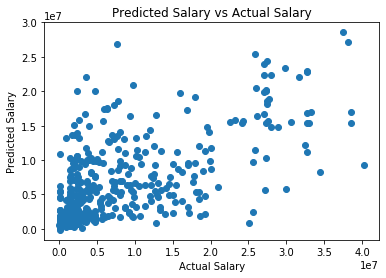

In [18]:
import matplotlib.pyplot as plt

prediction = player_stats_19_20[['Ensemble']]

ensemble_array = []
for index, row in prediction.iterrows():
    num = int(row['Ensemble'])
    ensemble_array.append(num)
prediction = ensemble_array

salary = player_stats_19_20[['Salary']]

salary_array = []
for index, row in salary.iterrows():
    num = int(row['Salary'])
    salary_array.append(num)
salary = salary_array

plt.scatter(salary, prediction)
plt.title("Predicted Salary vs Actual Salary")
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.show()

Age vs Actual Salary

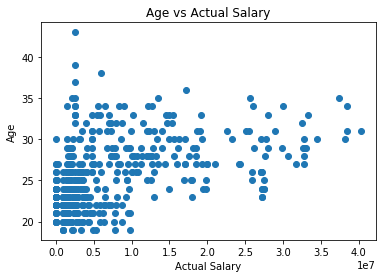

In [19]:
age = player_stats_19_20['Age']

plt.scatter(salary, age)
plt.title("Age vs Actual Salary")
plt.xlabel("Actual Salary")
plt.ylabel("Age")
plt.show()

Age vs Predicted Salary

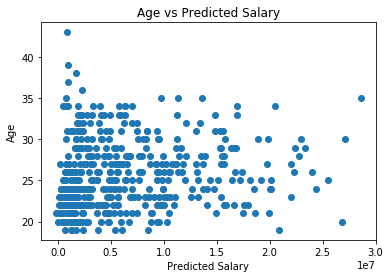

In [20]:
plt.scatter(prediction, age)
plt.title("Age vs Predicted Salary")
plt.xlabel("Predicted Salary")
plt.ylabel("Age")
plt.show()

Value Difference vs Actual Salary

Red line at y = 0


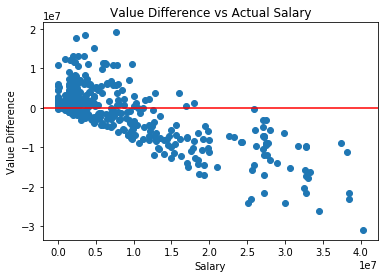

In [21]:
val_diff = player_stats_19_20[['Value Diff']]

val_diff_array = []
for index, row in val_diff.iterrows():
    num = int(row['Value Diff'])
    val_diff_array.append(num)
val_diff = val_diff_array

print('Red line at y = 0')

plt.scatter(salary, val_diff)
plt.title("Value Difference vs Actual Salary")
plt.xlabel("Salary")
plt.ylabel("Value Difference")
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

Value Difference vs Predicted Salary

Red line at y = 0


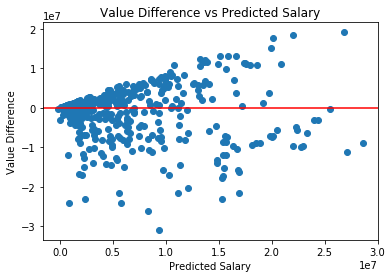

In [22]:
print('Red line at y = 0')

plt.scatter(prediction, val_diff)
plt.title("Value Difference vs Predicted Salary")
plt.xlabel("Predicted Salary")
plt.ylabel("Value Difference")
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

Predicted Salary vs Player Efficiency Rating

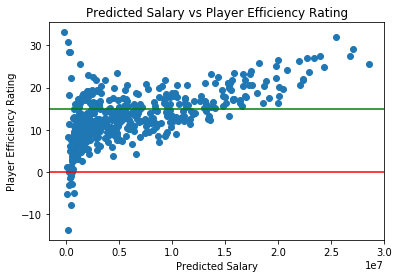

In [23]:
per = player_stats_19_20[['PER']]

plt.scatter(prediction, per)
plt.title("Predicted Salary vs Player Efficiency Rating")
plt.xlabel("Predicted Salary")
plt.ylabel("Player Efficiency Rating")
plt.axhline(y=0, color='r', linestyle='-')
# Standard league average is 15 PER
plt.axhline(y=15, color='g', linestyle='-')
plt.show()

Predicted Salary vs Value Over Replacement Player

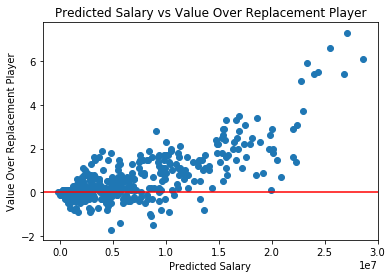

In [24]:
vorp = player_stats_19_20[['VORP']]

plt.scatter(prediction, vorp)
plt.title("Predicted Salary vs Value Over Replacement Player")
plt.xlabel("Predicted Salary")
plt.ylabel("Value Over Replacement Player")
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

Predicted Salary vs Box Plus/Minus

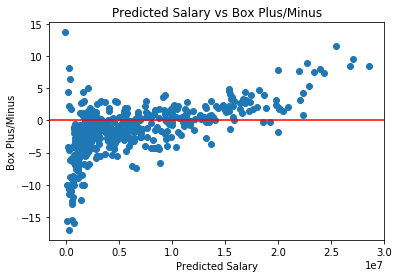

In [25]:
bpm = player_stats_19_20[['BPM']]

plt.scatter(prediction, bpm)
plt.title("Predicted Salary vs Box Plus/Minus")
plt.xlabel("Predicted Salary")
plt.ylabel("Box Plus/Minus")
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

Predicted Salary vs Usage Percentage

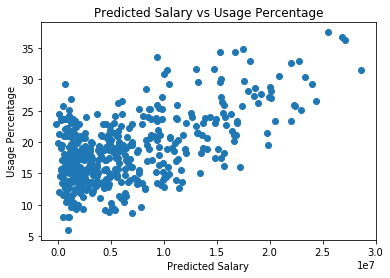

In [26]:
usg = player_stats_19_20[['USG%']]

plt.scatter(prediction, usg)
plt.title("Predicted Salary vs Usage Percentage")
plt.xlabel("Predicted Salary")
plt.ylabel("Usage Percentage")
plt.show()

Age vs Value Difference

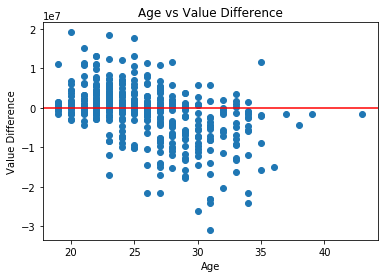

In [27]:
plt.scatter(age, val_diff)
plt.title("Age vs Value Difference")
plt.xlabel("Age")
plt.ylabel("Value Difference")
plt.axhline(y=0, color='r', linestyle='-')
plt.show()


# Clustering 

Age vs Predicted Value Difference

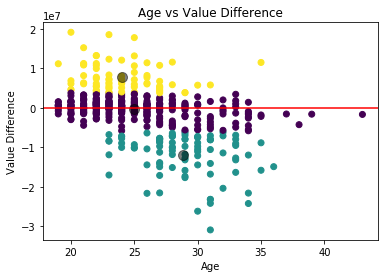

In [28]:
from sklearn.cluster import KMeans

age_val_diff = []
for i in range(len(val_diff)):
    age_val_diff.append([age[i], val_diff[i]])

kmeans = KMeans(n_clusters=3).fit(age_val_diff)
y_kmeans = kmeans.predict(age_val_diff)


plt.scatter(age, val_diff, c=y_kmeans)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5);
plt.axhline(y=0, color='r', linestyle='-')
plt.title("Age vs Value Difference")
plt.xlabel("Age")
plt.ylabel("Value Difference")
plt.show()


Age vs Actual Salary

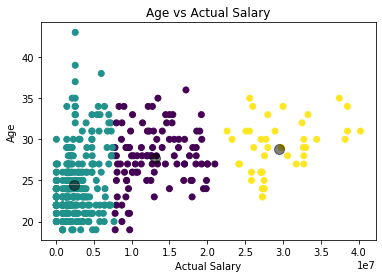

In [29]:
salary_age = []
for i in range(len(salary)):
    salary_age.append([salary[i], age[i]])
    
kmeans = KMeans(n_clusters=3).fit(salary_age)
y_kmeans = kmeans.predict(salary_age)

plt.scatter(salary, age, c=y_kmeans)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5);
plt.title("Age vs Actual Salary")
plt.xlabel("Actual Salary")
plt.ylabel("Age")
plt.show()

Age vs Predicted Salary

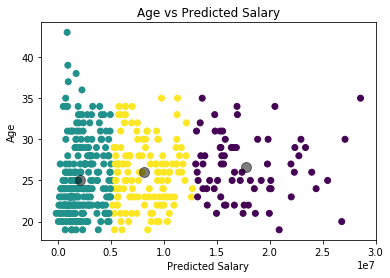

In [30]:
prediction_age = []
for i in range(len(prediction)):
    prediction_age.append([prediction[i], age[i]])
    
kmeans = KMeans(n_clusters=3).fit(prediction_age)
y_kmeans = kmeans.predict(prediction_age)

plt.scatter(prediction, age, c=y_kmeans)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5);
plt.title("Age vs Predicted Salary")
plt.xlabel("Predicted Salary")
plt.ylabel("Age")
plt.show()

Actual Salary vs Value Diff

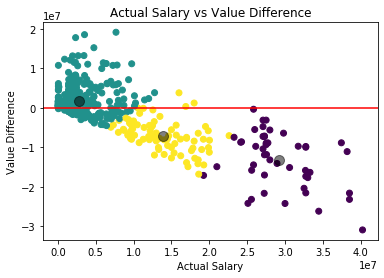

In [31]:
salary_val_diff = []
for i in range(len(salary)):
    salary_val_diff.append([salary[i], val_diff[i]])
    

    
kmeans = KMeans(n_clusters=3).fit(salary_val_diff)
y_kmeans = kmeans.predict(salary_val_diff)

plt.scatter(salary, val_diff, c=y_kmeans)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5);
plt.axhline(y=0, color='r', linestyle='-')
plt.title("Actual Salary vs Value Difference")
plt.xlabel("Actual Salary")
plt.ylabel("Value Difference")
plt.show()

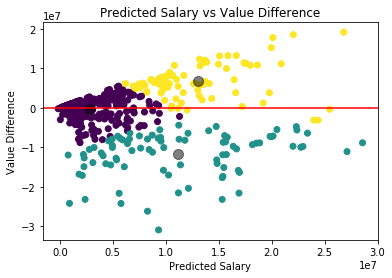

In [32]:
prediction_val_diff = []
for i in range(len(prediction)):
    prediction_val_diff.append([prediction[i], val_diff[i]])
    

    
kmeans = KMeans(n_clusters=3).fit(prediction_val_diff)
y_kmeans = kmeans.predict(prediction_val_diff)

plt.scatter(prediction, val_diff, c=y_kmeans)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5);
plt.axhline(y=0, color='r', linestyle='-')
plt.title("Predicted Salary vs Value Difference")
plt.xlabel("Predicted Salary")
plt.ylabel("Value Difference")
plt.show()